<h1>Benchmark de modèles pour l'expertise forecasting</h1>

<p>L'objectif est d'effectuer un benchmark du maximum de modèles afin de pourvoir alimenter le nautilus en données et permettre aux datascientists de l'utiliser pour choisir leurs modèles. Pour cela nous allons utiliser les données provenant d'une compétion Kaggle ayant pour objectif de prédire le future traffic d'une page Wikipedia. Nous allons effectuer la même préparation des données pour tout les modèles et les tester sur ces données.</p>
<p>Kaggle https://www.kaggle.com/c/web-traffic-time-series-forecasting</p>
<p>Nautilus https://artefactory.github.io/nautilus_forecasting/core.where_to_start/index.html</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Exploration des données</h2>

<p>La compétition Kaggle nous propose 6 fichiers csv qui contiennent les visites quotidiennes de 145000 pages wikipedia.</p>

In [2]:
key_1 = pd.read_csv('../Data/key_1.csv')
key_2 = pd.read_csv('../Data/key_2.csv')
sample_submission_1 = pd.read_csv('../Data/sample_submission_1.csv')
sample_submission_2 = pd.read_csv('../Data/sample_submission_2.csv')
train_1 = pd.read_csv('../Data/train_1.csv')
train_2 = pd.read_csv('../Data/train_2.csv')

In [3]:
print("key_1 " + str(key_1.shape))
print(key_1.head())
print("\nkey_2 " + str(key_2.shape))
print(key_2.head())
print("\nsample_submission_1 " + str(sample_submission_1.shape))
print(sample_submission_1.head())
print("\nsample_submission_2 " + str(sample_submission_2.shape))
print(sample_submission_2.head())
print("\ntrain_1 " + str(train_1.shape))
print(train_1.iloc[:,0:3].head())
print("\ntrain_2 " + str(train_2.shape))
print(train_2.iloc[:,0:3].head())

key_1 (8703780, 2)
                                                Page            Id
0  !vote_en.wikipedia.org_all-access_all-agents_2...  bf4edcf969af
1  !vote_en.wikipedia.org_all-access_all-agents_2...  929ed2bf52b9
2  !vote_en.wikipedia.org_all-access_all-agents_2...  ff29d0f51d5c
3  !vote_en.wikipedia.org_all-access_all-agents_2...  e98873359be6
4  !vote_en.wikipedia.org_all-access_all-agents_2...  fa012434263a

key_2 (8993906, 2)
                                                Page            Id
0  007_スペクター_ja.wikipedia.org_all-access_all-agen...  0b293039387a
1  007_スペクター_ja.wikipedia.org_all-access_all-agen...  7114389dd824
2  007_スペクター_ja.wikipedia.org_all-access_all-agen...  057b02ff1f09
3  007_スペクター_ja.wikipedia.org_all-access_all-agen...  bd2aca21caa3
4  007_スペクター_ja.wikipedia.org_all-access_all-agen...  c0effb42cdd5

sample_submission_1 (8703780, 2)
             Id  Visits
0  bf4edcf969af       0
1  929ed2bf52b9       0
2  ff29d0f51d5c       0
3  e98873359be6       0
4  

<p>Les fichiers train contiennent le nombre de visite quotidienne pour chaque page. Le fichier key permet de faire le lien entre les nomes des page et les identifiants qui leurs sont donneés et qui sont utilisés pour uploader nos prédictions sur Kaggle. Les fichiers sample_submission sont eux des exemples de prédictions à soumettre sur Kaggle. Il y a deux versions dechaque fichiers car la compétion se faisaient en deux étapes: une première où on prédit les visites passé jusqu'au 12 septembre 2017 et la deuxième où on prédit les visites futurs 13 septembre 2017 jusqu'au 13 Novembre 2017.</p>
<p>Nous allons travailler uniquement avec le fichier train_1</p>

In [4]:
train_1 = pd.read_csv('../Data/train_1.csv')
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
train_1_reduce = train_1[0:3]
train_1_reduce = train_1_reduce.fillna(0)
train_1_reduce = train_1_reduce.set_index('Page')
train_1_reduce = train_1_reduce.T.rename_axis('Dates')
train_1_reduce.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider
Dates,,,
2015-07-01,18.0,11.0,1.0
2015-07-02,11.0,14.0,0.0
2015-07-03,5.0,15.0,1.0
2015-07-04,13.0,18.0,1.0
2015-07-05,14.0,11.0,0.0


In [6]:
train_1_reduce.index.dtype

dtype('O')

count    550.000000
mean       5.203636
std       13.505932
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max      210.000000
Name: 3C_zh.wikipedia.org_all-access_spider, dtype: float64


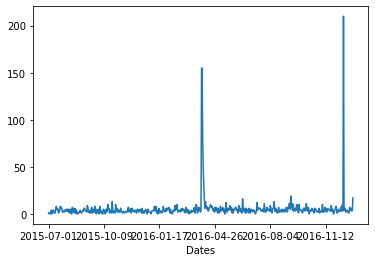

In [67]:
print(train_1_reduce['3C_zh.wikipedia.org_all-access_spider'].describe())
train_1_reduce['3C_zh.wikipedia.org_all-access_spider'].plot()

<h2>Modèles ARIMA</h2>

In [29]:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [44]:
train = train_1_reduce[:500]
test = train_1_reduce[500:550]

In [21]:
train.head()

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider
Dates,,,
2015-07-01,18.0,11.0,1.0
2015-07-02,11.0,14.0,0.0
2015-07-03,5.0,15.0,1.0
2015-07-04,13.0,18.0,1.0
2015-07-05,14.0,11.0,0.0


In [68]:
model = pm.auto_arima(train['3C_zh.wikipedia.org_all-access_spider'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3465.586, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3889.110, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3487.759, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3572.038, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3465.928, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3464.576, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3498.928, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3462.721, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3485.608, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3448.955, Time=0.43 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=3454.386, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3447.157, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3

In [69]:
preds, conf = model.predict(n_periods=test.shape[0], return_conf_int=True) # renvoie prédiction et intervalles de confiances
print(preds)
predictions = pd.DataFrame(preds, index = test.index)
print(predictions)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(valid['3C_zh.wikipedia.org_all-access_spider'], preds)))

[2.2557249  3.53210933 4.18301907 4.51495941 4.68423693 4.77056232
 4.81458514 4.83703518 4.84848389 4.85432231 4.8572997  4.85881805
 4.85959236 4.85998723 4.8601886  4.86029129 4.86034366 4.86037036
 4.86038398 4.86039093 4.86039447 4.86039628 4.8603972  4.86039767
 4.86039791 4.86039803 4.86039809 4.86039812 4.86039814 4.86039815
 4.86039815 4.86039815 4.86039815 4.86039816 4.86039816 4.86039816
 4.86039816 4.86039816 4.86039816 4.86039816 4.86039816 4.86039816
 4.86039816 4.86039816 4.86039816 4.86039816 4.86039816 4.86039816
 4.86039816 4.86039816]
                   0
Dates               
2016-11-12  2.255725
2016-11-13  3.532109
2016-11-14  4.183019
2016-11-15  4.514959
2016-11-16  4.684237
2016-11-17  4.770562
2016-11-18  4.814585
2016-11-19  4.837035
2016-11-20  4.848484
2016-11-21  4.854322
2016-11-22  4.857300
2016-11-23  4.858818
2016-11-24  4.859592
2016-11-25  4.859987
2016-11-26  4.860189
2016-11-27  4.860291
2016-11-28  4.860344
2016-11-29  4.860370
2016-11-30  4.860384

In [ ]:
# Accuracy metrics
'''def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)'''

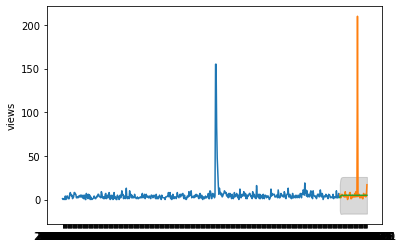

In [70]:
#plot the predictions for validation set
plt.plot(train['3C_zh.wikipedia.org_all-access_spider'], label='Train')
plt.plot(test['3C_zh.wikipedia.org_all-access_spider'], label='Valid')
plt.plot(predictions, label='Prediction')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.ylabel('views')
plt.show()

<h2>Modèles de boosting</h2>

<h2>Prophète</h2>